In [1]:
print("all ok")

all ok


In [35]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [3]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")

In [4]:
if not GOOGLE_API_KEY:
    raise ValueError("GOOGLE_API_KEY is missing in your .env")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [6]:
chat_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [7]:
chat_llm.invoke("Hello, how are you?")

AIMessage(content='Hello!\n\nAs an AI, I don\'t experience emotions or have a physical state, so I don\'t "feel" in the human sense. However, I am functioning perfectly and ready to assist you.\n\nThank you for asking! How can I help you today?', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c8ba6-853b-7e30-bb57-6fe42d6b180e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 571, 'total_tokens': 578, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 514}})

In [8]:
from typing_extensions import TypedDict, Annotated
import operator

In [9]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [10]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]

In [11]:
{
    "messages": [HumanMessage(content="Hi, this is Sunny. Say hello in detail.")]
}

{'messages': [HumanMessage(content='Hi, this is Sunny. Say hello in detail.', additional_kwargs={}, response_metadata={})]}

In [12]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM using conversation messages and append AI response."""
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {
        "messages": [response]
    }

In [13]:
def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [14]:
from langgraph.graph import StateGraph,START,END

In [15]:
!pip install IPython

In [16]:
from IPython.display import Image, display

In [17]:
builder=StateGraph(GraphState)

In [18]:
builder.add_node("llm_call",llm_call)
builder.add_node("token_counter",token_counter)

In [19]:

builder.add_edge(START,"llm_call")
builder.add_edge("llm_call","token_counter")
builder.add_edge("token_counter",END)

In [20]:
app=builder.compile()

In [21]:
print(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])


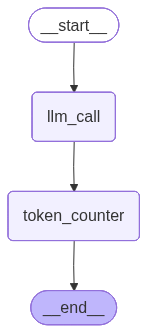

In [22]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result=app.invoke({
    "messages":[HumanMessage(content="Hi this is Geetha.Say Hello in detail")]
})

In [24]:
result

{'messages': [HumanMessage(content='Hi this is Geetha.Say Hello in detail', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello Geetha!\n\nIt's absolutely wonderful to connect with you. I'm here and ready to assist you with whatever you need today. Please feel free to tell me what's on your mind, whether you have a question, need information, want to brainstorm ideas, or just fancy a chat.\n\nI'm all ears and looking forward to our conversation! How can I make your day a little easier or more interesting right now?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c8ba6-a583-7983-9861-d9c7ec047d99-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 819, 'total_tokens': 830, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 728}}),
  AIMessage(content='Total token number in

In [25]:
for msg in result['messages']:
    print(type(msg).__name__," : ",msg.content)


HumanMessage  :  Hi this is Geetha.Say Hello in detail
AIMessage  :  Hello Geetha!

It's absolutely wonderful to connect with you. I'm here and ready to assist you with whatever you need today. Please feel free to tell me what's on your mind, whether you have a question, need information, want to brainstorm ideas, or just fancy a chat.

I'm all ears and looking forward to our conversation! How can I make your day a little easier or more interesting right now?
AIMessage  :  Total token number in the generated answer (word count) is 70


In [26]:
chat_llm


ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'text_inputs': True, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'text_outputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', client=<google.genai.client.Client object at 0x0000019AC6F4D550>, default_metadata=(), model_kwargs={})

In [27]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [28]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)

In [29]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [30]:
wiki_tool.run({
    "query":"Generative AI"
})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

In [37]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [39]:
tool=TavilySearchResults(tavilly_api_key=TAVILY_API_KEY)

C:\Users\phani\AppData\Local\Temp\ipykernel_3680\2494850146.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavilly_api_key=TAVILY_API_KEY)


In [40]:
tool.invoke({"query":"how is the job market for fresher grad in 2026"})

[{'title': 'Navigating the 2026 Job Market for New Grads | Sean Slater posted ...',
  'url': 'https://www.linkedin.com/posts/seancslater_companies-predict-2026-will-be-the-worst-activity-7396612294534647808-SDUB',
  'content': 'Older workers often create age bias against themselves ... Some tips for success: ... Know and market your functional skills ... Know your market compensation rate for those skills; whatever paycheck you once received does not mean you are worth that in 2026 ... STOP pushing your supervisory or manager skills. Employers probably cannot grow that and have competent people in place for 5-10 years from now. However, there can be a leading role for you (am 70 and walked into a VP/large company position based upon my functional skills and agenda to grow the next generation) ... Ask yourself: what NEW skills have YOU added in last 12-24 months? ... Important for 2026: at every level of work, be able to discuss the impact that A.I. has/could have on your career field a

In [42]:
from langchain_community.tools import DuckDuckGoSearchRun
ddgsr=DuckDuckGoSearchRun()

In [43]:
ddgsr.invoke("what is the latest update on iphone 17 release")

Impersonate 'chrome_100' does not exist, using 'random'


"1 week ago - It was announced on June 5, 2023, at Apple's annual Worldwide Developers Conference alongside watchOS 10, iPadOS 17, tvOS 17 and macOS Sonoma. It was made publicly available on September 18, 2023 , as a free software update for supported iOS devices (see the supported devices section). 2 weeks ago - New screening tools for calls and messages help eliminate distractions so users can focus on the conversations that matter most. iOS 26 also introduces new features in CarPlay, Apple Music, Maps, and Wallet, as well as Apple Games, a brand-new ... 2 weeks ago - New screening tools for calls and messages help eliminate distractions so users can focus on the conversations that matter most. iOS 26 also introduces new features in CarPlay, Apple Music, Maps, and Wallet, as well as Apple Games, a brand-new ... October 9, 2025 - The iPhone 17e is rumoured to launch in the spring of 2026 . Read on for more detailed analysis of the new iPhone 17 colors, cameras, battery life, specs, an